In [65]:
import pandas as pd
from conversation_converter import procesar_conversaciones
import warnings
import json
import matplotlib.pyplot as plt

# Movies

## Users

In [13]:
user_data_movie = pd.read_json('Movies/user_ids.json', orient='index')
user_data_movie.reset_index(inplace=True)
user_data_movie.columns = ['user_id', 'user_number']
print(user_data_movie.head())

          user_id  user_number
0  A30Q8X8B1S3GGT            0
1  A2NBOL825B93OM            1
2  A1HO9J4DCQDGP9            2
3  A1EMDSTJDUE6B0            3
4  A23QOAXJSWIBS6            4


In [14]:
user_data_movie.describe()

,user_number
count,3131.000000
mean,1565.000000
std,903.986172
min,0.000000
25%,782.500000
50%,1565.000000
75%,2347.500000
max,3130.000000


## Items

In [15]:
item_data_movie = pd.read_json('Movies/item_map.json', orient='index')
item_data_movie.reset_index(inplace=True)
item_data_movie.columns = ['item_id', 'item_name']
print(item_data_movie.head())

      item_id                                       item_name
0  630352138X                       No Highway In The Sky VHS
1  630434063X                                     Outland VHS
2  B00006SFIW                                 The Black Raven
3  6303142346  La Bella y La Bestia Beauty and the Beast  VHS
4  B001UHOWX8                                 White Christmas


In [16]:
item_data_movie.describe()

,item_id,item_name
count,9687,9687
unique,9687,9518
top,630352138X,Journey to the Center of the Earth
freq,1,4


## Conversation

In [11]:
input_file = 'Movies/Conversation.txt'
output_file = 'Movies/Conversation.json'
procesar_conversaciones(input_file, output_file)

Procesando conversación: 0
Procesando conversación: 1
Procesando conversación: 2
Procesando conversación: 3
Procesando conversación: 4
Procesando conversación: 5
Procesando conversación: 6
Procesando conversación: 7
Procesando conversación: 8
Procesando conversación: 9
Procesando conversación: 10
Procesando conversación: 11
Procesando conversación: 12
Procesando conversación: 13
Procesando conversación: 14
Procesando conversación: 15
Procesando conversación: 16
Procesando conversación: 17
Procesando conversación: 18
Procesando conversación: 19
Procesando conversación: 20
Procesando conversación: 21
Procesando conversación: 22
Procesando conversación: 23
Procesando conversación: 24
Procesando conversación: 25
Procesando conversación: 26
Procesando conversación: 27
Procesando conversación: 28
Procesando conversación: 29
Procesando conversación: 30
Procesando conversación: 31
Procesando conversación: 32
Procesando conversación: 33
Procesando conversación: 34
Procesando conversación: 35
Pr

In [12]:
conversations_movie = pd.read_json('Movies/Conversation.json')
print(conversations_movie.head())

   conversation_id                                           messages
0                0  [User: Hi, I'm Mark Savary. I really enjoyed w...
1                1  [User: Hi there! I recently watched "The Screa...
2                2  [User: Hello, I had a terrible experience with...
3                3  [User: Hi! I recently watched The Bourne Ident...
4                4  [User: Hi there! I've had a terrible experienc...


In [13]:
conversations_movie.describe()

,conversation_id
count,10089.000000
mean,5044.000000
std,2912.587767
min,0.000000
25%,2522.000000
50%,5044.000000
75%,7566.000000
max,10088.000000


In [17]:
conversations_movie.messages.apply(len).describe()

count    10089.000000
mean        10.526316
std          2.387875
min          4.000000
25%          8.000000
50%         10.000000
75%         12.000000
max         20.000000
Name: messages, dtype: float64

## Final Data

In [60]:
def cargar_jsonl(file_path):
    arch = []
    conv = []
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            data = json.loads(line)
            for user_id, user_data in data.items():
                num_interactions = len(user_data.get('history_interaction', []))
                num_might_like = len(user_data.get('user_might_like', []))
                num_conversations = len(user_data.get('Conversation', []))
                #for conversations in user_data.get('Conversation', []):
                arch.append({
                    'user_id': user_id,
                    'num_interactions': num_interactions,
                    'num_might_like': num_might_like,
                    'num_conversations': num_conversations
                })
                c = []
                for i, conversation in enumerate(user_data.get('Conversation', [])):
                    conversation_key = f"conversation_{i + 1}"
                    c.append({
                        conversation_key: {
                            'conversation_id': conversation[f'conversation_{i + 1}']['conversation_id'],
                            'user_likes': conversation[f'conversation_{i + 1}'].get('user_likes', []),
                            'user_dislikes': conversation[f'conversation_{i + 1}'].get('user_dislikes', []),
                            'rec_item': conversation[f'conversation_{i + 1}'].get('rec_item', [])
                        }
                    })
                    
                conv.append({
                    'user_id': user_id,
                    'conversations': c
                })
    return arch, conv

data, conversations = cargar_jsonl('Movies/final_data.jsonl')

final_data = pd.json_normalize(data)
final_conversations = pd.json_normalize(conversations)
final_data.head()

,user_id,num_interactions,num_might_like,num_conversations
0,A30Q8X8B1S3GGT,19,2,2
1,A2NBOL825B93OM,38,3,3
2,A1HO9J4DCQDGP9,46,3,3
3,A1EMDSTJDUE6B0,120,9,9
4,A23QOAXJSWIBS6,41,1,1


In [62]:
final_conversations.head()

,user_id,conversations
0,A30Q8X8B1S3GGT,"[{'conversation_1': {'conversation_id': 0, 'us..."
1,A2NBOL825B93OM,"[{'conversation_1': {'conversation_id': 2, 'us..."
2,A1HO9J4DCQDGP9,"[{'conversation_1': {'conversation_id': 5, 'us..."
3,A1EMDSTJDUE6B0,"[{'conversation_1': {'conversation_id': 8, 'us..."
4,A23QOAXJSWIBS6,"[{'conversation_1': {'conversation_id': 17, 'u..."


In [66]:
final_data.describe()

,num_interactions,num_might_like,num_conversations
count,3131.000000,3131.000000,3131.000000
mean,47.444267,3.222293,3.222293
std,64.087228,4.760235,4.760235
min,8.000000,1.000000,1.000000
25%,18.000000,1.000000,1.000000
50%,30.000000,2.000000,2.000000
75%,52.000000,3.000000,3.000000
max,960.000000,87.000000,87.000000


In [73]:
final_data.sum()

user_id              A30Q8X8B1S3GGTA2NBOL825B93OMA1HO9J4DCQDGP9A1EM...
num_interactions                                                148548
num_might_like                                                   10089
num_conversations                                                10089
dtype: object

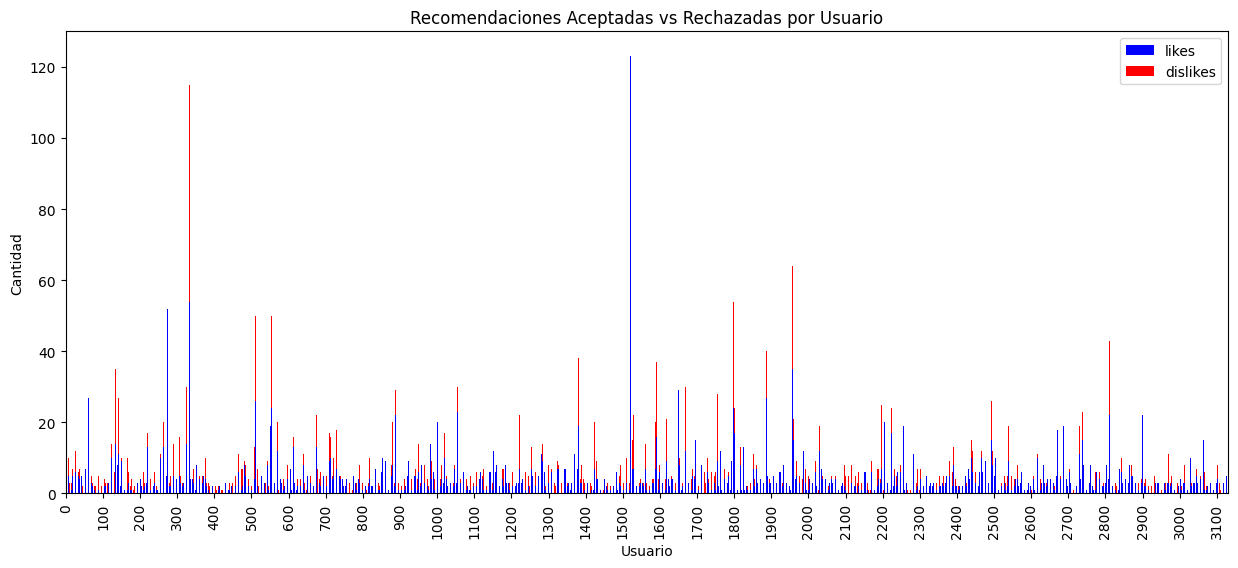

In [93]:
user_likes = []
user_dislikes = []
users_ids = []

contador = 0
for conversations in final_conversations['conversations']:
    likes = 0
    dislikes = 0
    for conversation in conversations:
        for key, value in conversation.items():
            likes += len(value.get('user_likes', []))
            dislikes += len(value.get('user_dislikes', []))
    users_ids.append(contador)
    user_likes.append(likes)
    user_dislikes.append(dislikes)
    contador += 1

# Crear un DataFrame para el gráfico
df_likes_dislikes = pd.DataFrame({
    'user_id': users_ids,
    'likes': user_likes,
    'dislikes': user_dislikes
})

# Gráfico de barras apiladas

df_likes_dislikes.set_index('user_id').plot(kind='bar', stacked=True, figsize=(15,6), color=['blue', 'red'])
plt.xticks(ticks=range(0, len(df_likes_dislikes), 100), rotation=90)  # Mostramos 1 de cada 10 etiquetas
plt.ylim(0, 130)

plt.title('Recomendaciones Aceptadas vs Rechazadas por Usuario')
plt.xlabel('Usuario')
plt.ylabel('Cantidad')
plt.xticks(rotation=90)
plt.show()


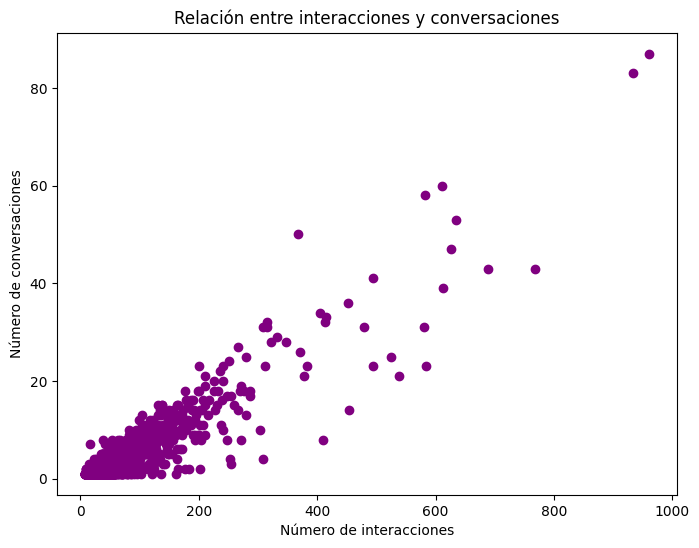

In [83]:
plt.figure(figsize=(8,6))
plt.scatter(final_data['num_interactions'], final_data['num_conversations'], color='purple')
plt.title('Relación entre interacciones y conversaciones')
plt.xlabel('Número de interacciones')
plt.ylabel('Número de conversaciones')
plt.show()

# Books

## Users

In [19]:
user_data_books = pd.read_json('Books/user_ids.json', orient='index')
user_data_books.reset_index(inplace=True)
user_data_books.columns = ['user_id', 'user_number']
print(user_data_books.head())

                user_id  user_number
0   A0020356UF96ZV361ST            0
1  A0074327B7QLWYD8R3D0            1
2  A01423305PUDQS2VV7QX            2
3  A01433701FZ0LF5G2RUL            3
4  A0146440VS25LT8V96SZ            4


In [32]:
user_data_books.describe()

,user_number
count,9852.00000
mean,4925.50000
std,2844.17176
min,0.00000
25%,2462.75000
50%,4925.50000
75%,7388.25000
max,9851.00000


## Items

In [31]:
warnings.simplefilter(action='ignore', category=FutureWarning)
item_data_books = pd.read_json('Books/item_map.json', orient='index')
item_data_books.reset_index(inplace=True)
item_data_books.columns = ['item_id', 'item_name']
print(item_data_books.head())

      item_id                                          item_name
0  1508785929                                        Finessers 3
1  1512208086                These Niggas Ain't Loyal (Volume 1)
2  1940574366             Promiscuous Girl (G Street Chronicles)
3  1938442881               Nikki (G Street Chronicles Presents)
4  1940574390  Dope Girl's Ambition (G Street Chronicles Pres...


In [33]:
item_data_books.describe()

,item_id,item_name
count,172605,172605
unique,172605,169152
top,1508785929,
freq,1,27


## Conversation

In [18]:
input_file = 'Books/Conversation.txt'
output_file = 'Books/Conversation.json'
procesar_conversaciones(input_file, output_file)

Procesando conversación: 0
Procesando conversación: 1
Procesando conversación: 2
Procesando conversación: 3
Procesando conversación: 4
Procesando conversación: 5
Procesando conversación: 6
Procesando conversación: 7
Procesando conversación: 8
Procesando conversación: 9
Procesando conversación: 10
Procesando conversación: 11
Procesando conversación: 12
Procesando conversación: 13
Procesando conversación: 14
Procesando conversación: 15
Procesando conversación: 16
Procesando conversación: 17
Procesando conversación: 18
Procesando conversación: 19
Procesando conversación: 20
Procesando conversación: 21
Procesando conversación: 22
Procesando conversación: 23
Procesando conversación: 24
Procesando conversación: 25
Procesando conversación: 26
Procesando conversación: 27
Procesando conversación: 28
Procesando conversación: 29
Procesando conversación: 30
Procesando conversación: 31
Procesando conversación: 32
Procesando conversación: 33
Procesando conversación: 34
Procesando conversación: 35
Pr

In [34]:
conversations_books = pd.read_json('Books/Conversation.json')
print(conversations_books.head())

   conversation_id                                           messages
0                0  [User: Hello! I recently read "We Both Can't B...
1                1  [User: Hello, I'm Kindle Customer. I really en...
2                2  [User: Hi, I'm Jen (A0074327B7QLWYD8R3D0)! I r...
3                3  [User: Hi there! I recently read "Ghost of the...
4                4  [User: Hi, I'm Kindle Customer. I recently rea...


In [35]:
conversations_books.describe()

,conversation_id
count,25016.000000
mean,12507.500000
std,7221.641503
min,0.000000
25%,6253.750000
50%,12507.500000
75%,18761.250000
max,25015.000000


In [36]:
conversations_books.messages.apply(len).describe()

count    25016.000000
mean        10.599656
std          2.615607
min          3.000000
25%          8.000000
50%         10.000000
75%         12.000000
max         40.000000
Name: messages, dtype: float64

## Final Data

In [79]:
data, conversations = cargar_jsonl('Books/final_data.jsonl')

final_data_books = pd.json_normalize(data)
final_conversations_books = pd.json_normalize(conversations)

In [80]:
final_data_books.describe()

,num_interactions,num_might_like,num_conversations
count,9852.000000,9852.000000,9852.000000
mean,39.002233,2.419306,2.419306
std,64.260590,3.921326,3.921326
min,9.000000,1.000000,1.000000
25%,14.000000,1.000000,1.000000
50%,21.000000,1.000000,1.000000
75%,38.000000,2.000000,2.000000
max,1957.000000,112.000000,112.000000


In [81]:
final_data_books.sum()

user_id              A0020356UF96ZV361STA0074327B7QLWYD8R3D0A014233...
num_interactions                                                384250
num_might_like                                                   23835
num_conversations                                                23835
dtype: object

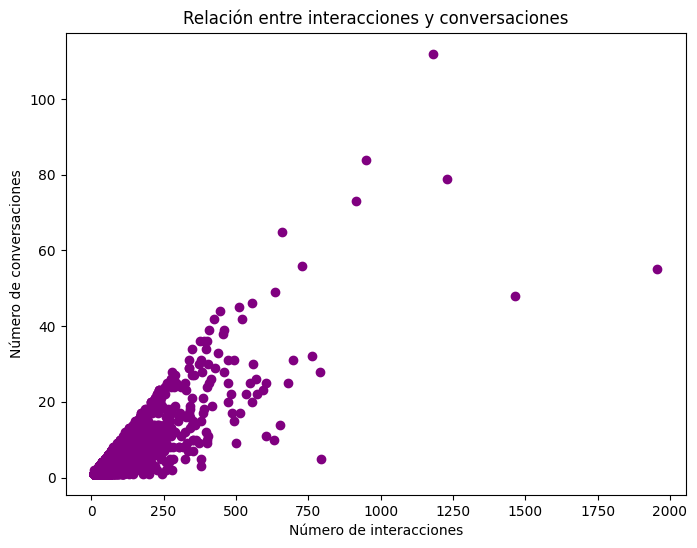

In [84]:
plt.figure(figsize=(8,6))
plt.scatter(final_data_books['num_interactions'], final_data_books['num_conversations'], color='purple')
plt.title('Relación entre interacciones y conversaciones')
plt.xlabel('Número de interacciones')
plt.ylabel('Número de conversaciones')
plt.show()

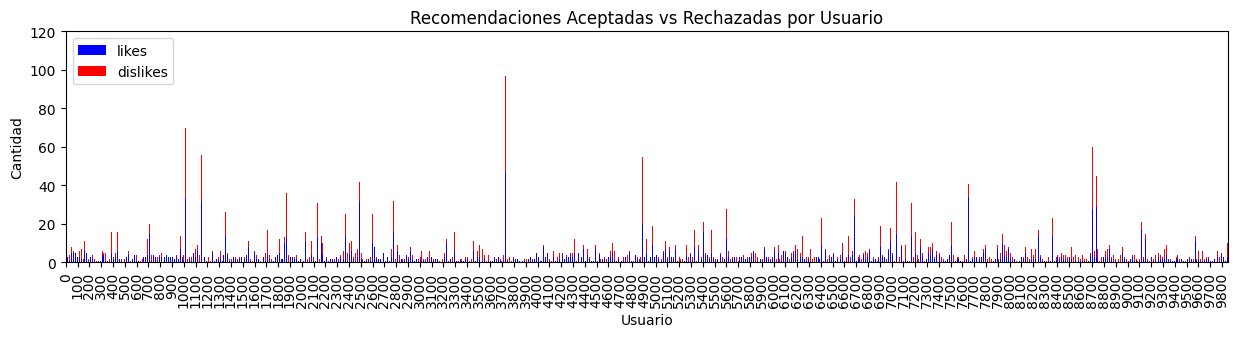

In [91]:
user_likes = []
user_dislikes = []
users_ids = []

contador = 0
for conversations in final_conversations_books['conversations']:
    likes = 0
    dislikes = 0
    for conversation in conversations:
        for key, value in conversation.items():
            likes += len(value.get('user_likes', []))
            dislikes += len(value.get('user_dislikes', []))
    users_ids.append(contador)
    user_likes.append(likes)
    user_dislikes.append(dislikes)
    contador += 1

# Crear un DataFrame para el gráfico
df_likes_dislikes = pd.DataFrame({
    'user_id': users_ids,
    'likes': user_likes,
    'dislikes': user_dislikes
})

# Gráfico de barras apiladas

df_likes_dislikes.set_index('user_id').plot(kind='bar', stacked=True, figsize=(15,3), color=['blue', 'red'])
plt.xticks(ticks=range(0, len(df_likes_dislikes), 100), rotation=90)  # Mostramos 1 de cada 10 etiquetas
plt.ylim(0, 120)

plt.title('Recomendaciones Aceptadas vs Rechazadas por Usuario')
plt.xlabel('Usuario')
plt.ylabel('Cantidad')
plt.xticks(rotation=90)
plt.show()
